# Statistical data analysis

## Table of content

# Table of Contents
1. [Introduction](#introduction)
2. [Objectives](#objectives)
3. [Initialization](#initialization)
   - 3.1. [Load libraries](#load-libraries)
   - 3.2. [Load dataframes](#load-dataframes)
     - 3.2.1. [Plans Data](#plans-data)
     - 3.2.2. [Users Data](#users-data)
     - 3.2.3. [Calls Data](#calls-data)
     - 3.2.4. [Messages Data](#messages-data)
     - 3.2.5. [Internet Data](#internet-data)
4. [Fare Conditions](#fare-conditions)
5. [Data per User](#data-per-user)
   - 5.1. [Calls](#calls)
   - 5.2. [Messages](#messages)
   - 5.3. [Internet](#internet)
6. [User Analysis](#user-analysis)
   - 6.1. [Calls](#calls-analysis)
   - 6.2. [Messages](#messages-analysis)
   - 6.3. [Internet](#internet-analysis)
7. [Income](#income)
8. [Testing Statistical Hypotheses](#testing-statistical-hypotheses)
   - 8.1. [First Hypothesis](#first-hypothesis)
   - 8.2. [Second Hypothesis](#second-hypothesis)
9. [Conclusions](#conclusions)


## Introduction

Megaline wants to know which of its two most popular plans, Surf or Ultimate, generates more money. Based on the findings, the advertising budget may be changed to improve the promotion of the less lucrative plan while also promoting the highest-earning plan. To address this, a preliminary study will be performed on data from 500 consumers. The dataset contains information on user demographics, locations, plan kinds, and usage statistics (number of calls and text messages sent) for 2018. The investigation will focus on analyzing consumer behavior and determining which prepaid plan adds the most to the company's income.

## Objectives

* Determine whether the Surf or Ultimate plan is more profitable for Megaline. 
* Recognize consumption trends by learning how clients utilize each plan, including call and text message habits.
* Offer suggestions for modifying the advertising budget with the goal of enhancing the lower-revenue plan's profitability while preserving the top-earning plan's performance.

## Initialization
We begin by importing the libraries that will help us analyze our data. In this analysis, we will use the libraries pandas, numpy, matplotlib.pyplot, seaborn, and scipy. These libraries will enable us to process our datasets more efficiently, facilitating their visualization and hypothesis testing.

In [2]:
!pip install scipy

### Load libraries

In [3]:
# Load all libraries
import pandas as pd
import numpy as np
import math as mt
from scipy import stats as st
from matplotlib import pyplot as plt

### Load dataframes

In [4]:
# Load the data files into different DataFrames
calls = pd.read_csv('megaline_calls.csv')
internet= pd.read_csv('megaline_internet.csv')
messages= pd.read_csv('megaline_messages.csv')
plans= pd.read_csv('megaline_plans.csv')
users= pd.read_csv('megaline_users.csv')

#### Plans Data

In [5]:
# Display general information
plans.info()  
print('='*60)
# Display the first few rows of the plans DataFrame
plans.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



The data corresponds to the plans offered by the company. The data types are in the correct format, and there are no duplicate or null values. However, it is necessary to correct the 'mb_per_month_included' column because its values do not match the plans offered by the company. This could be an issue in the following steps, as the company rounds the data even if it exceeds by a second or a megabyte.

In [6]:
# Correcting values in the data
# Change the values of mb_per_month_included
plans.loc[0, 'mb_per_month_included'] = 15000
plans.loc[1, 'mb_per_month_included'] = 30000

# Convert total data usage from megabytes to gigabytes
plans['gb_per_month'] = plans['mb_per_month_included'] / 1024
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15000               500   
1               1000                  30000              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month  
0     14.648438  
1     29.296875  


In [7]:
users_plans = users.merge(plans, left_on='plan', right_on='plan_name', how='inner')
print(users_plans.columns)

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'gb_per_month'],
      dtype='object')


We add columns that may be useful for later processes.

#### Users Data

In [8]:
# Display general information/summary about the users DataFrame
users.info()  
print("="*40)
# Display the first few rows of the users DataFrame
users.head()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



We have the data of our users, and we can observe a wide variety of information, ranging from their names to their ages, including data such as their plan type and whether they are active or retired with the company. The data regarding their affiliation contains null values, which indicate that they are still with their plans and have not retired. Therefore, we can fill in these missing values with the current date, indicating how long they have been with their plan. We can also correct the date format to make it easier to work with.

In [9]:
# Convert reg_date and churn_date to datetime with the specified format
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

# Calculate the subscription duration
users['subscription_duration'] = (users['churn_date'] - users['reg_date']).dt.days

# Handle users who have not yet canceled
today = pd.to_datetime('today')
users['subscription_duration'] = users['subscription_duration'].fillna((today - users['reg_date']).dt.days)


We can categorize the users' age and also add a column that indicates whether a user is active or not.

In [10]:
def categorize_age(age):
    if age < 20:
        return 'Joven'
    elif 20 <= age < 35:
        return 'joven Adulto'
    elif 35<= age <50:
        return 'adulto'
    else:
        return 'Mayor'

users['age_category'] = users['age'].apply(categorize_age)

users['is_churn'] = users['churn_date'].notnull()

#### Calls Data

In [11]:
# Display general information/summary about the calls DataFrame
calls.info()  # Display a sample of the data for calls
print("="*40)
# Display the first few rows of the calls DataFrame
print(calls.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


The DataFrame contains data on customer calls, including the user, call duration, and call dates. The user column should be a string, while call_duration should be numeric, and call_date should be in the datetime format. If any of these columns contain incorrect data types or missing values, they need to be corrected. For example, we may need to convert call_duration to numeric values and ensure call_date is in the proper date format. Any missing or incorrect data can be handled by filling, dropping, or converting values as needed.

In [12]:
# Convert the 'call_date' column to datetime format
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Extract the year from the 'call_date' and create a new column
calls['year'] = calls['call_date'].dt.year

# Extract the month from the 'call_date' and create a new column
calls['month'] = calls['call_date'].dt.month

# Extract the day from the 'call_date' and create a new column
calls['day'] = calls['call_date'].dt.day

# Extract the name of the day of the week from the 'call_date' and create a new column
calls['day_of_week'] = calls['call_date'].dt.day_name()

# Extract the hour from the 'call_date' and create a new column
calls['hour'] = calls['call_date'].dt.hour

# Function to categorize call durations
def duration_calls(duration):
    if duration < 0:
        return 'invalid'  
    elif 0 <= duration < 5:
        return 'short'  
    elif 5 <= duration < 10:
        return 'medium'  
    else:
        return 'long'  

# Apply the 'duration_calls' function to the 'duration' column to create a new 'duration_call' column
calls['duration_call'] = calls['duration'].apply(duration_calls)

The code processes the calls DataFrame by extracting various date-related features such as the year, month, day, weekday, and hour from the call_date column, which helps in analyzing the data more granularly. It also defines a function, duration_calls, to categorize call durations into four categories: invalid, short, medium, and long. The function is then applied to the duration column to create a new duration_call column, enabling easier classification of call lengths. This allows for better understanding and analysis of call patterns based on both time and duration.

#### Messages data

This code processes the messages DataFrame by extracting various components from the message_date column:

Converts the message_date column to a datetime object.
Extracts the year, month, day, day of the week, and hour from the message_date and creates new columns for each of these values.

In [13]:
# Display general information/summary about the messages DataFrame
messages.info()  
print("="*40)
# Display the first 10 rows of the messages DataFrame
print(messages.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28


The DataFrame contains 76,051 entries with three columns: id, user_id, and message_date. All columns have non-null values, with id as an object, user_id as an integer, and message_date as an object. The memory usage is around 1.7 MB. The sample data shows that the id column consists of unique identifiers for each message, while user_id corresponds to the user associated with the message. The message_date column stores the date of each message, which appears to be in string format. The next step would be to convert the message_date column to a datetime format for easier analysis.

In [14]:
# Convert the 'message_date' column to datetime format
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Extract the year from the 'message_date' and create a new column
messages['year'] = messages['message_date'].dt.year

# Extract the month from the 'message_date' and create a new column
messages['month'] = messages['message_date'].dt.month

# Extract the day from the 'message_date' and create a new column
messages['day'] = messages['message_date'].dt.day

# Extract the name of the day of the week from the 'message_date' and create a new column
messages['day_of_week'] = messages['message_date'].dt.day_name()

# Extract the hour from the 'message_date' and create a new column
messages['hour'] = messages['message_date'].dt.hour

This code processes the messages DataFrame by extracting various components from the message_date column:

Converts the message_date column to a datetime object.
Extracts the year, month, day, day of the week, and hour from the message_date and creates new columns for each of these values.

#### Internet data

In [15]:
# Display general information/summary about the internet DataFrame
internet.info()  
print("="*50)
# Display the first 10 rows of the internet DataFrame
print(internet.head(10))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92


The code processes and aggregates internet usage data by first converting the session_date to a datetime format, allowing for the extraction of year, month, day, and day of the week. This enables more detailed time-based analysis. The data is then grouped by user_id, year, and month to calculate the total data usage for each user on a monthly basis. This total is converted from megabytes to gigabytes and rounded to the nearest whole number. The resulting total_gb_df DataFrame offers a clear summary of each user's monthly internet usage in gigabytes, facilitating the analysis of consumption patterns over time.

In [16]:
# Convert 'session_date' to datetime format for easier analysis
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Extract year, month, day, and day of the week from the 'session_date' column
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month
internet['day'] = internet['session_date'].dt.day
internet['day_of_week'] = internet['session_date'].dt.day_name()

# Group the data by user_id, year, and month, then sum the 'mb_used' to calculate total usage per user per month
total_usage = internet.groupby(['user_id', 'year', 'month'])['mb_used'].sum().reset_index()

# Round the total data usage to the nearest gigabyte for simplicity
total_usage['gb_used'] = np.ceil(total_usage['mb_used'] / 1024)

# Convert the grouped data into a new DataFrame
total_gb_df = pd.DataFrame(total_usage)

# Print the total data usage per user per month in gigabytes
print(total_gb_df)


      user_id  year  month   mb_used  gb_used
0        1000  2018     12   1901.47      2.0
1        1001  2018      8   6919.15      7.0
2        1001  2018      9  13314.82     14.0
3        1001  2018     10  22330.49     22.0
4        1001  2018     11  18504.30     19.0
...       ...   ...    ...       ...      ...
2272     1498  2018     12  23137.69     23.0
2273     1499  2018      9  12984.76     13.0
2274     1499  2018     10  19492.43     20.0
2275     1499  2018     11  16813.83     17.0
2276     1499  2018     12  22059.21     22.0

[2277 rows x 5 columns]


The code processes and aggregates internet usage data for each user. It starts by converting the session_date column to a datetime format and then extracts the year, month, day, and day of the week into new columns for easier time-based analysis. The data is grouped by user_id, year, and month to calculate the total data usage (mb_used) for each user per month. This total is then converted to gigabytes and rounded to the nearest whole number. The resulting DataFrame, total_gb_df, shows the total data usage in gigabytes for each user, providing a summary of their monthly internet consumption.

## fare conditions
We'll review the plan options the company has for its customers.

In [17]:
# Print the plan options and make sure they are clear
print("Plan types")
print(plans["plan_name"])
print("Plan costs")
print(plans["usd_monthly_pay"])

Plan types
0        surf
1    ultimate
Name: plan_name, dtype: object
Plan costs
0    20
1    70
Name: usd_monthly_pay, dtype: int64


## Data per user
We will refresh the data to perform a more comprehensive analysis

### Calls

In [18]:
# Calculate the number of calls made by each user per month. 

calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month
calls['day']= calls['call_date'].dt.day
calls['day_of_week']= calls['call_date'].dt.day_name()

# Calculate the number of calls per user and month
monthly_calls = calls.groupby(['user_id', 'year', 'month']).size().reset_index(name='total_calls')

monthly_calls_df= pd.DataFrame(monthly_calls)
print(monthly_calls_df)

      user_id  year  month  total_calls
0        1000  2018     12           16
1        1001  2018      8           27
2        1001  2018      9           49
3        1001  2018     10           65
4        1001  2018     11           64
...       ...   ...    ...          ...
2253     1498  2018     12           39
2254     1499  2018      9           41
2255     1499  2018     10           53
2256     1499  2018     11           45
2257     1499  2018     12           65

[2258 rows x 4 columns]


In [19]:
# Calculate the number of minutes used by each user per month.
# Round the call duration from seconds to minutes
calls['call_duration_minutes'] = calls['duration'].apply(lambda x: (x + 59) // 60)

# Convert the 'call_date' column to a datetime format
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Calculate the number of minutes used by each user per month
calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month
calls['day'] = calls['call_date'].dt.day
calls['day_of_week'] = calls['call_date'].dt.day_name()

# Group by 'user_id', 'year', and 'month' and sum the 'call_duration_minutes'
monthly_minutes = calls.groupby(['user_id', 'year', 'month'])['call_duration_minutes'].sum().reset_index()
monthly_minutes_df = pd.DataFrame(monthly_minutes)

# Print the resulting DataFrame
print(monthly_minutes_df)


      user_id  year  month  call_duration_minutes
0        1000  2018     12                   16.0
1        1001  2018      8                   21.0
2        1001  2018      9                   38.0
3        1001  2018     10                   45.0
4        1001  2018     11                   44.0
...       ...   ...    ...                    ...
2253     1498  2018     12                   31.0
2254     1499  2018      9                   35.0
2255     1499  2018     10                   38.0
2256     1499  2018     11                   36.0
2257     1499  2018     12                   52.0

[2258 rows x 4 columns]


### Messages

In [20]:
# Calculate the year and month for each message
messages['year'] = messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month
messages['day'] = messages['message_date'].dt.day
messages['day_of_week'] = messages['message_date'].dt.day_name()

# Calculate the number of messages per user and month
monthly_messages = messages.groupby(['user_id', 'year', 'month']).size().reset_index(name='total_messages')

monthly_messages_df = pd.DataFrame(monthly_messages)

# Show the new DataFrame
print(monthly_messages_df)


      user_id  year  month  total_messages
0        1000  2018     12              11
1        1001  2018      8              30
2        1001  2018      9              44
3        1001  2018     10              53
4        1001  2018     11              36
...       ...   ...    ...             ...
1801     1496  2018      9              21
1802     1496  2018     10              18
1803     1496  2018     11              13
1804     1496  2018     12              11
1805     1497  2018     12              50

[1806 rows x 4 columns]


### Internet

In [21]:
# Calculate the volume of Internet traffic used by each user per month. Save the result.
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month

# Group by 'user_id', 'year', and 'month' and sum the 'mb_used'
monthly_gb = internet.groupby(['user_id', 'year', 'month'])['mb_used'].sum().reset_index()

# Convert the result into a new DataFrame
monthly_gb_df = pd.DataFrame(monthly_gb)

# Print the new DataFrame
print(monthly_gb_df)


      user_id  year  month   mb_used
0        1000  2018     12   1901.47
1        1001  2018      8   6919.15
2        1001  2018      9  13314.82
3        1001  2018     10  22330.49
4        1001  2018     11  18504.30
...       ...   ...    ...       ...
2272     1498  2018     12  23137.69
2273     1499  2018      9  12984.76
2274     1499  2018     10  19492.43
2275     1499  2018     11  16813.83
2276     1499  2018     12  22059.21

[2277 rows x 4 columns]


In [22]:
# Merge the DataFrames based on user_id and month
merged_df = monthly_messages_df.merge(monthly_minutes_df, on=['user_id', 'year', 'month'], how='outer')

# Merge the resulting DataFrame with total_gb_df
merged_df = monthly_gb_df.merge(merged_df, on=['user_id', 'year', 'month'], how='outer')

# Visualize the resulting DataFrame
print(merged_df.head())


   user_id  year  month   mb_used  total_messages  call_duration_minutes
0     1000  2018     12   1901.47            11.0                   16.0
1     1001  2018      8   6919.15            30.0                   21.0
2     1001  2018      9  13314.82            44.0                   38.0
3     1001  2018     10  22330.49            53.0                   45.0
4     1001  2018     11  18504.30            36.0                   44.0


In [23]:
# Merge the DataFrame with user information based on 'user_id'
merged_plans = merged_df.merge(users, on='user_id', how='left')

# Merge the resulting DataFrame with plan information based on the plan columns
final_merged_data = merged_plans.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Print the resulting DataFrame
print(final_merged_data.head())


   user_id  year  month   mb_used  total_messages  call_duration_minutes  \
0     1000  2018     12   1901.47            11.0                   16.0   
1     1001  2018      8   6919.15            30.0                   21.0   
2     1001  2018      9  13314.82            44.0                   38.0   
3     1001  2018     10  22330.49            53.0                   45.0   
4     1001  2018     11  18504.30            36.0                   44.0   

  first_name  last_name  age                                   city  ...  \
0   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA  ...   
1     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  ...   
2     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  ...   
3     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  ...   
4     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  ...   

  is_churn messages_included mb_per_month_included  minutes_included  \
0    False    

In [26]:
# Calculate the excess usage
final_merged_data['excess_minutes'] = (final_merged_data['call_duration_minutes'] - final_merged_data['minutes_included']).clip(lower=0)
final_merged_data['excess_messages'] = (final_merged_data['total_messages'] - final_merged_data['messages_included']).clip(lower=0)
final_merged_data['excess_data'] = ((final_merged_data['mb_used']/ 1024) - final_merged_data['mb_per_month_included'] / 1024).clip(lower=0)

# Calculate the additional costs
final_merged_data['extra_minutes_cost'] = final_merged_data['excess_minutes'] * final_merged_data['usd_per_minute']
final_merged_data['extra_messages_cost'] = final_merged_data['excess_messages'] * final_merged_data['usd_per_message']
final_merged_data['extra_data_cost'] = final_merged_data['excess_data'] * final_merged_data['usd_per_gb']

# Calculate the total monthly income
final_merged_data['total_income'] = final_merged_data['usd_monthly_pay'] + final_merged_data['extra_minutes_cost'] + final_merged_data['extra_messages_cost'] + final_merged_data['extra_data_cost']

# Show the result
print(final_merged_data[['user_id', 'year', 'month', 'total_income']].head(50))


    user_id  year  month  total_income
0      1000  2018     12     70.000000
1      1001  2018      8     20.000000
2      1001  2018      9     20.000000
3      1001  2018     10     91.676816
4      1001  2018     11     54.221680
5      1001  2018     12     62.667773
6      1002  2018     10     20.000000
7      1002  2018     11     62.432422
8      1002  2018     12     20.000000
9      1003  2018     12    137.618555
10     1004  2018      5     20.000000
11     1004  2018      6     75.398633
12     1004  2018      7    112.935742
13     1004  2018      8    146.774805
14     1004  2018      9     57.624219
15     1004  2018     10     20.000000
16     1004  2018     11     86.902148
17     1004  2018     12     82.395410
18     1005  2018     12     40.900098
19     1006  2018     11     70.000000
20     1006  2018     12     84.484121
21     1007  2018      8    112.216328
22     1007  2018      9    148.163574
23     1007  2018     10    243.762480
24     1007  2018     11 

## User analysis

### Calls

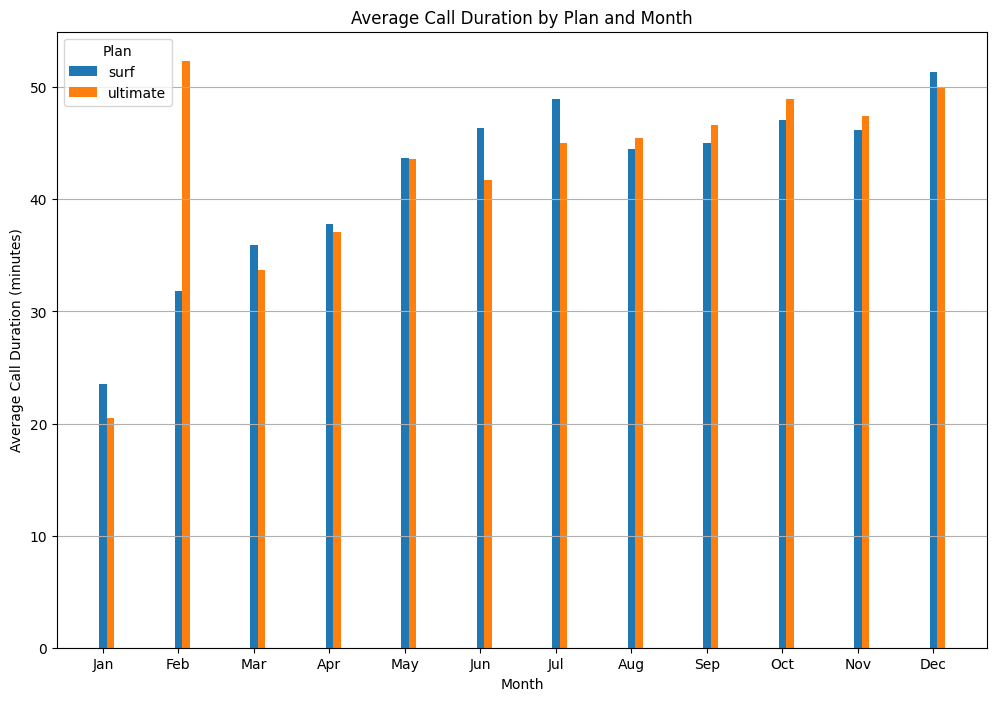

In [27]:
# Compare the average call duration per plan and per month. Plot a bar chart to visualize it.
average_duration = final_merged_data.groupby(['plan', 'year', 'month'])['call_duration_minutes'].mean().reset_index()

# Create a figure and axes
plt.figure(figsize=(12, 8))

# Get the unique plans
plans = average_duration['plan'].unique()

# Plot a bar chart for each plan
for plan in plans:
    # Filter data by plan
    plan_data = average_duration[average_duration['plan'] == plan]
    
    # Create the bar chart
    plt.bar(
        plan_data['month'] + (0.1 * plans.tolist().index(plan)),  # Offset to avoid overlapping bars
        plan_data['call_duration_minutes'],
        width=0.1,
        label=plan
    )

# Chart settings
plt.title('Average Call Duration by Plan and Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.legend(title='Plan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')

# Show the chart
plt.show()


The behavior of both plans is quite similar, with the Ultimate plan generally being the predominant one, except for a few months. However, in February, the Ultimate plan takes a significant lead over the Surf plan.

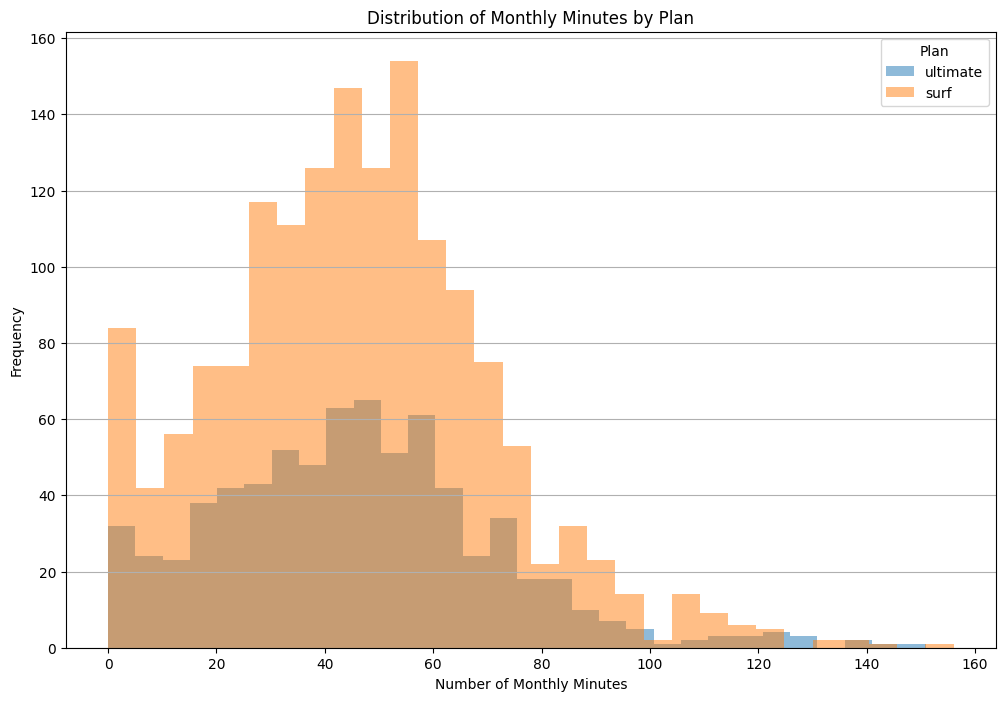

In [28]:
# Group the data by plan, year, and month, and sum the minutes per user
monthly_minutes = final_merged_data.groupby(['user_id', 'plan', 'year', 'month'])['call_duration_minutes'].sum().reset_index()

# Get the unique plans
plans = monthly_minutes['plan'].unique()

# Create a figure and axes
plt.figure(figsize=(12, 8))

# Plot a histogram for each plan
for plan in plans:
    # Filter data by plan
    plan_data = monthly_minutes[monthly_minutes['plan'] == plan]
    
    # Create the histogram
    plt.hist(
        plan_data['call_duration_minutes'],
        bins=30,
        alpha=0.5,
        label=plan
    )

# Chart settings
plt.title('Distribution of Monthly Minutes by Plan')
plt.xlabel('Number of Monthly Minutes')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.grid(axis='y')

# Show the chart
plt.show()


In [29]:
# Calculate the mean and variance of monthly call duration.
# Group the data by user_id, year, month, and plan, and sum the minutes per user and plan
monthly_minutes_by_plan = final_merged_data.groupby(['user_id', 'year', 'month', 'plan'])['call_duration_minutes'].sum().reset_index()

# Calculate the mean and variance of the monthly call duration for each plan
mean_duration_by_plan = monthly_minutes_by_plan.groupby('plan')['call_duration_minutes'].mean()
variance_duration_by_plan = monthly_minutes_by_plan.groupby('plan')['call_duration_minutes'].var()

# Show the results
print(f"Mean monthly call duration for the Surf plan: {mean_duration_by_plan['surf']}")
print(f"Variance of monthly call duration for the Surf plan: {variance_duration_by_plan['surf']}")

print(f"Mean monthly call duration for the Ultimate plan: {mean_duration_by_plan['ultimate']}")
print(f"Variance of monthly call duration for the Ultimate plan: {variance_duration_by_plan['ultimate']}")


Mean monthly call duration for the Surf plan: 45.77113795295613
Variance of monthly call duration for the Surf plan: 611.7109476228135
Mean monthly call duration for the Ultimate plan: 46.080555555555556
Variance of monthly call duration for the Ultimate plan: 652.3884948230567


The analysis shows that the mean monthly call duration for both the Surf and Ultimate plans is quite similar, with the Ultimate plan being slightly higher. However, the Ultimate plan exhibits greater variance, indicating more fluctuation in call duration among its users. Despite the similarity in average usage, the Ultimate plan, being more expensive, is preferred by users who value its additional features and higher quality service. This suggests that marketing strategies should highlight the premium benefits of the Ultimate plan to justify its cost, while the Surf plan can be promoted for its affordability and consistent value.

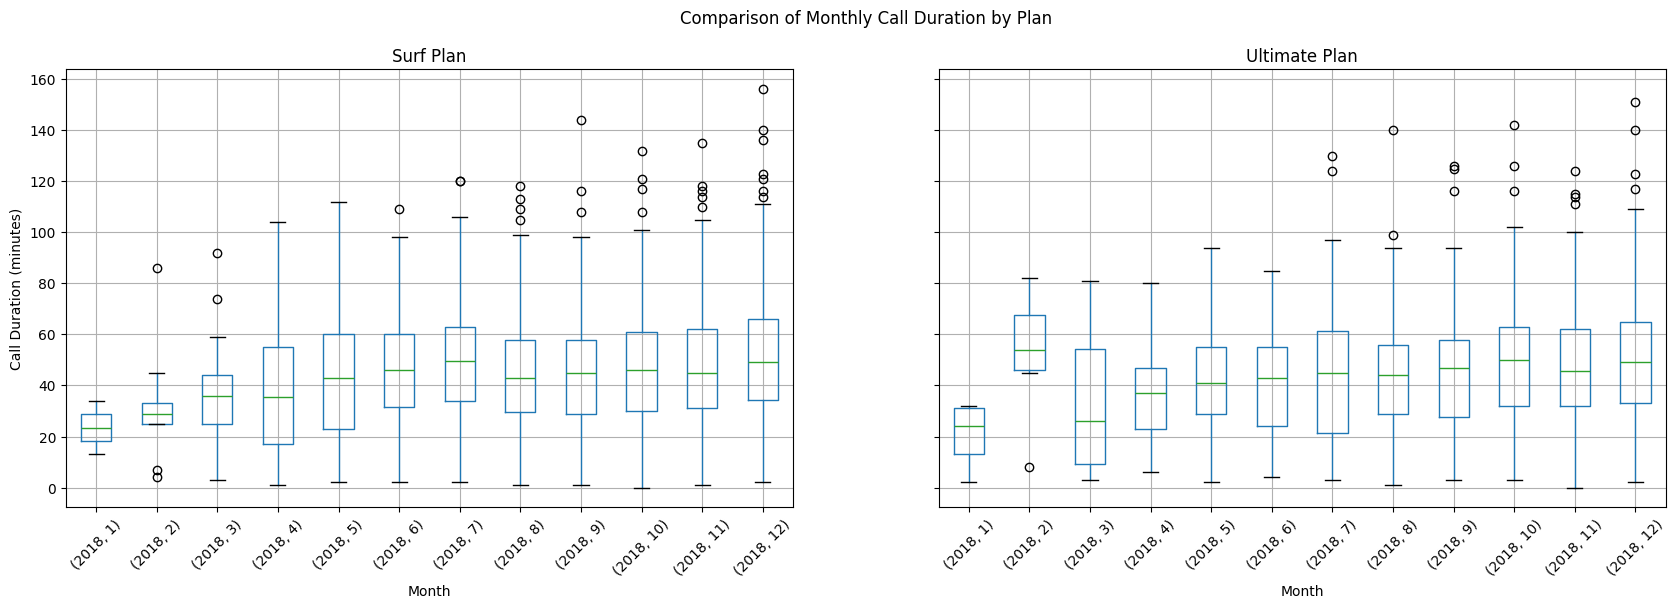

In [30]:
# Filter the data by each plan
surf_data = final_merged_data[final_merged_data['plan'] == 'surf']
ultimate_data = final_merged_data[final_merged_data['plan'] == 'ultimate']

# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharey=True)

# Plot the box plot for the 'surf' plan
surf_data.boxplot(column='call_duration_minutes', by=['year', 'month'], ax=axes[0])
axes[0].set_title('Surf Plan')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Call Duration (minutes)')
axes[0].tick_params(axis='x', rotation=45)

# Plot the box plot for the 'ultimate' plan
ultimate_data.boxplot(column='call_duration_minutes', by=['year', 'month'], ax=axes[1])
axes[1].set_title('Ultimate Plan')
axes[1].set_xlabel('Month')
axes[1].tick_params(axis='x', rotation=45)

# Set the overall title
plt.suptitle('Comparison of Monthly Call Duration by Plan')
plt.subplots_adjust(top=0.88)  # Adjust the position of the overall title

# Show the box plot
plt.show()


Although the Ultimate plan shows higher usage compared to the Surf plan, both plans exhibit similar trend behaviors. This similarity is evident because most of their outliers tend to appear towards the end of the year, which may coincide with the beginning of the holiday season. This seasonal effect could lead to increased usage patterns during that period.

### Messages

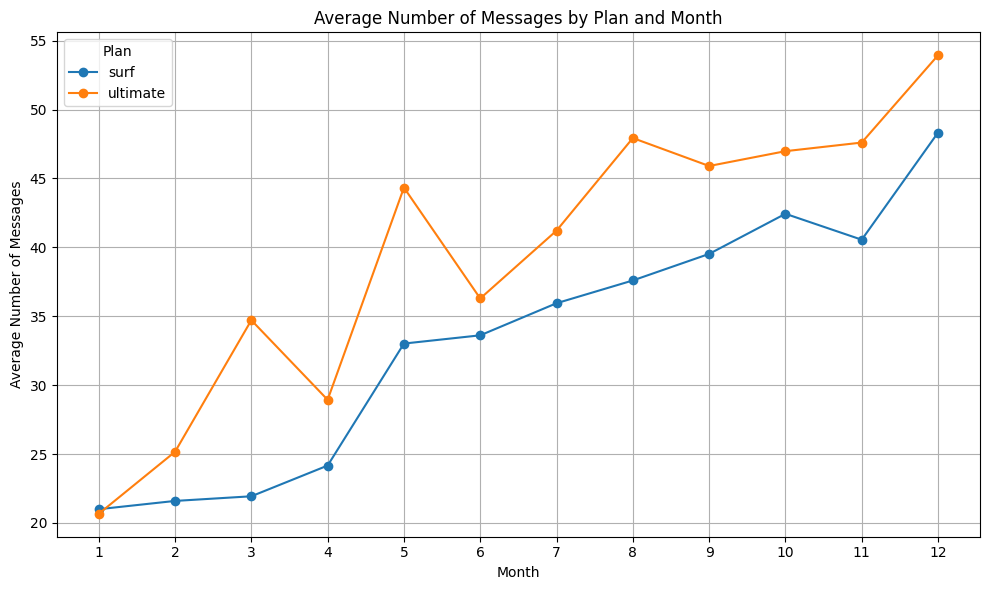

In [31]:
# Compare the number of messages sent each month by users of each plan
# Group by plan and month, and calculate the average number of messages
messages_by_plan_month = final_merged_data.groupby(['plan', 'month'])['total_messages'].mean().reset_index()

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Plot the bar chart to compare the number of messages by plan and month
for plan in messages_by_plan_month['plan'].unique():
    plan_data = messages_by_plan_month[messages_by_plan_month['plan'] == plan]
    plt.plot(plan_data['month'], plan_data['total_messages'], marker='o', label=plan)

# Set labels and title
plt.title('Average Number of Messages by Plan and Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Messages')
plt.xticks(range(1, 13))  # Set the months on the x-axis
plt.legend(title='Plan')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


The previous trends are also reflected in messaging patterns, where the Ultimate plan is more frequently used. However, there's a noticeable increase in usage as the holiday season begins. This suggests that users tend to communicate more via messages during this period, likely due to the festivities and increased social interactions.

### Internet

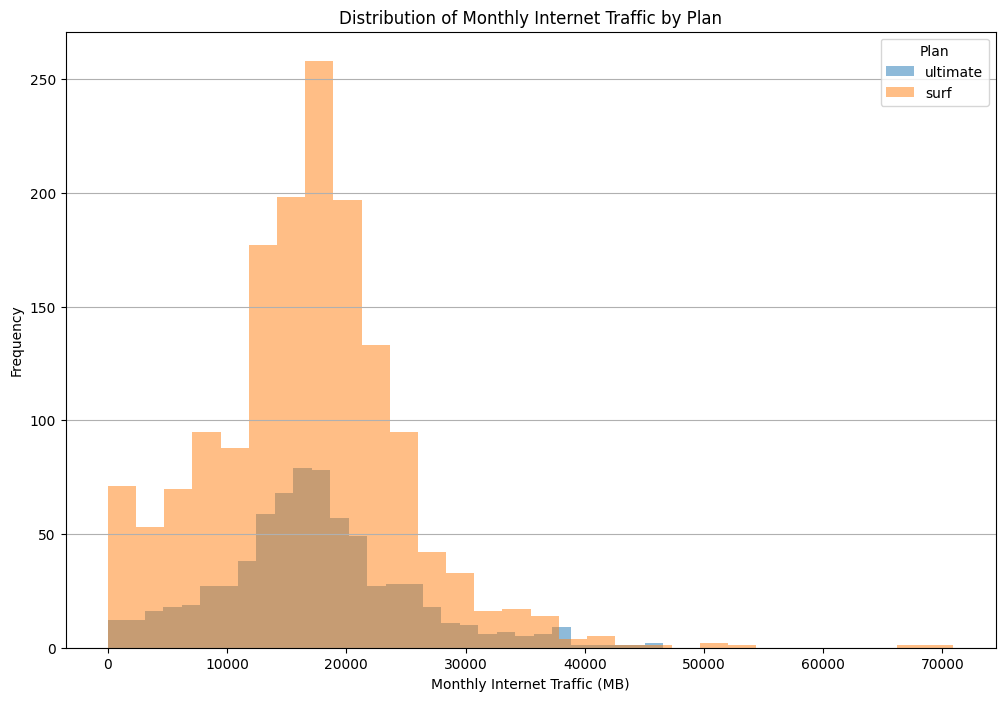

In [32]:
# Compare the amount of Internet traffic consumed by users per plan

# Group the data by user_id, plan, year, and month, and sum the Internet traffic per user
monthly_data_usage = final_merged_data.groupby(['user_id', 'plan', 'year', 'month'])['mb_used'].sum().reset_index()

# Get the unique plans
plans = monthly_data_usage['plan'].unique()

# Create a figure and axes
plt.figure(figsize=(12, 8))

# Plot a histogram for each plan
for plan in plans:
    # Filter data by plan
    plan_data = monthly_data_usage[monthly_data_usage['plan'] == plan]
    
    # Create the histogram
    plt.hist(
        plan_data['mb_used'],
        bins=30,
        alpha=0.5,
        label=plan
    )

# Chart settings
plt.title('Distribution of Monthly Internet Traffic by Plan')
plt.xlabel('Monthly Internet Traffic (MB)')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.grid(axis='y')

# Show the chart
plt.show()


## Income

In [34]:
# Calculate total income per plan
income_by_plan = final_merged_data.groupby('plan')['total_income'].sum().reset_index()

# Convert the income to millions of dollars
income_by_plan['total_income'] = income_by_plan['total_income']

print(income_by_plan)


       plan  total_income
0      surf  67693.940840
1  ultimate  41900.239609


* The Surf plan is the most popular among Megaline users.

* The analyses indicate that differentiated approaches can be taken for promoting both plans, thus attracting new customers and retaining existing ones, offering greater flexibility to grow the income from the Surf plan.

* For the Ultimate plan, the approaches should focus on highlighting the quality and reliability that come with having consistent and extensive availability of services like internet and calls.

## Testing statistical hypotheses

### First hypothesis
The average income of users of the Ultimate and Surf plans differs.

In [35]:
# Drop rows with missing values in the final_merged_data dataframe
final_merged_data.dropna(inplace=True)

# Filter users of the "Surf" plan
surf_users_df = final_merged_data[final_merged_data['plan'] == 'surf']

# Filter users of the "Ultimate" plan
ultimate_users_df = final_merged_data[final_merged_data['plan'] == 'ultimate']

# Select the variable of interest ('total_income')
variable_of_interest = 'total_income'

# Perform the two-sample t-test
results = st.ttest_ind(surf_users_df['total_income'], ultimate_users_df['total_income'], equal_var=False)

# Print the p-value
print('p-value:', results.pvalue)

# Set the significance level (alpha)
alpha = 0.05

# Interpret the results
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")


p-value: 0.02603973655069768
We reject the null hypothesis


### Second hypothesis

The average income of users in the New York-New Jersey state area is different from that of users in other regions.

In [36]:
# Filter users in the NY-NJ state area
ny_nj_users_df = final_merged_data[final_merged_data['city'].str.contains('NY-NJ')]

# Filter users from other regions
other_users_df = final_merged_data[~final_merged_data['city'].str.contains('NY-NJ')]

# Perform the two-sample t-test
results = st.ttest_ind(ny_nj_users_df['total_income'], other_users_df['total_income'], equal_var=False)

# Print the p-value
print('p-value:', results.pvalue)

# Set the significance level (alpha)
alpha = 0.05

# Interpret the results
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")


p-value: 0.00032874249872198627
We reject the null hypothesis


## Conslusions
* Income Differences: There is a significant difference in the average income generated by users on the Surf and Ultimate plans. Users on the Ultimate plan contribute more to the total income than those on the Surf plan. This disparity may be due to the higher cost per user associated with the Ultimate plan compared to the Surf plan.

* Regional Income Variation: No substantial disparity is observed between the users in the New York-New Jersey area and those in other regions regarding average income. The income levels are relatively consistent across different regions.

* Comprehensive Billing and User Analysis: To better understand the distribution of income and the user base composition, the total billing generated by all users of each plan has been calculated. A detailed analysis of the number of users per plan has also been conducted. This information is crucial for optimizing marketing strategies, developing more tailored service plans, and ultimately maximizing the profitability of the mobile service.